# `spaCy`

`spaCy` es una librería de Python utilizada para proyectos de **Procesamiento del Lenguaje Natural** (NLP) poniendo a la disposición del programador varias técnicas utilizadas en un pipeline de NLP:
- Tokenization
- Normalización del texto (eliminar mayúsculas, stemming, lemmatization)
- Part-Of-Speech tagging
- Named Entity Recognition (NER)

Para instalar `spaCy` y dependencias:
```
pip install spacy

pip install es-core-news-sm
```

In [1]:
import itertools as it
import pandas as pd
import spacy

In [2]:
nlp = spacy.load('es_core_news_sm')

# Load data

In [3]:
import pandas as pd
import random

In [4]:
df_clean = pd.read_pickle('/Users/eduardomorenoortiz/Desktop/ITAM/nanook/nlp_nanook/data/preprocessed/stemm_lemm_text_nanook.pkl')

In [5]:
df_clean[['Page Name', 'Message', 'Message_clean', 'Message_clean_stemm', 'Message_clean_lemm']].head()

,Page Name,Message,Message_clean,Message_clean_stemm,Message_clean_lemm
0,AgroForestales C.A.,Mitigar el cambio climático con los pies en la...,mitigar el cambio climatico con los pies en la...,mitig el cambi climat con los pies en la tierr,mitigar el cambio climatico con los pie en la ...
1,El Sol de San Juan del Río,#México 🇲🇽 | La Ciudad de México es la primera...,mexico la ciudad de mexico es la primera urb...,mexic la ciud de mexic es la primer urbe en la...,mexico la ciudad de mexico e la primera urbe e...
2,Víctor Quintana Silveyra,Para este 2018 que comienza les deseo de coraz...,para este 2018 que comienza les deseo de coraz...,par este 2018 que comienz les dese de corazon ...,para este 2018 que comienza le deseo de corazo...
3,Webguerrillera Internacional,La ONU lanza alerta roja para 2018 por armas n...,la onu lanza alerta roja para 2018 por armas n...,la onu lanz alert roj par 2018 por armas nucle...,la onu lanza alerta roja para 2018 por armas n...
4,Libertad y Pensamiento,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar en la lu...,novedoso proyecto busca instalar paneles solar...


In [6]:
df_clean.shape

(87422, 25)

In [7]:
print('ORIGINAL MESSAGE')
for i, text in enumerate(df_clean['Message']):
    print(f"Post {i + 1}: {text}")
    #display(Markdown(f"Post {i + 1}: {text}"))
    if i == 4:
        break
print("\n")

print('CLEAN MESSAGE')
for i, text in enumerate(df_clean['Message_clean']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('LEMMED MESSAGE')
for i, text in enumerate(df_clean['Message_clean_lemm']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('STEMMED MESSAGE')
for i, text in enumerate(df_clean['Message_clean_stemm']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

ORIGINAL MESSAGE
Post 1: Mitigar el cambio climático con los pies en la tierra. http://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/:=:https://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/
Post 2: #México 🇲🇽 | La Ciudad de México es la primera urbe en Latinoamérica que busca a la siguiente generación de mujeres líderes.
Post 3: Para este 2018 que comienza les deseo de corazón que hagan todo lo que disfruten, pero, más aún, que disfruten todo lo que hagan. Que repartan amor por todos lados: A los seres humanos y a toda la comunidad de los seres vivos. Porque el terrible calentamiento global Y el aún más serio calentamiento social, de violencias, odios, muertes y exclusiones, sólo los podemos anular si hacemos mucho más densa la “amorósfera”: La gran energía del amor presente, actuante y en continua expansión. Con esa solidaridad, con ese amor universal haremos presente la esperanza este 2018. Con m

In [8]:
facebook_post_clean = df_clean['Message_clean'].values.tolist()
facebook_post_clean[:5]

['mitigar el cambio climatico con los pies en la tierra ',
 'mexico   la ciudad de mexico es la primera urbe en latinoamerica que busca a la siguiente generacion de mujeres lideres',
 'para este 2018 que comienza les deseo de corazon que hagan todo lo que disfruten pero mas aun que disfruten todo lo que hagan que repartan amor por todos lados a los seres humanos y a toda la comunidad de los seres vivos porque el terrible calentamiento global y el aun mas serio calentamiento social de violencias odios muertes y exclusiones solo los podemos anular si hacemos mucho mas densa la amorosfera la gran energia del amor presente actuante y en continua expansion con esa solidaridad con ese amor universal haremos presente la esperanza este 2018 con mucho carino victor quintana',
 'la onu lanza alerta roja para 2018 por armas nucleares violacion a dh y cambio climatico la unidad es el camino insistio el secretario nuestro futuro depende de ello',
 'novedoso proyecto busca instalar paneles solares e

# Preprocess data: Tokenize by lemmatize text

In [9]:
from tqdm import tqdm

In [22]:
%time
tokens_spacy = []
for post in tqdm(facebook_post_clean[:4000]):
    doc = nlp(post)
    token_i = [token.lemma_ for token in doc if not token.is_stop]
    tokens_spacy.append(token_i)

print(tokens_spacy[:1])

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 13.1 µs


100%|██████████| 4000/4000 [01:18<00:00, 50.87it/s]

[['mitigar', 'cambio', 'climatico', 'pie', 'tierra']]


In [24]:
len(tokens_spacy)

4000

# N-grams

Es necesaria la versión `1.10.1` de `scipy`:

```
pip install scipy==1.10.1
```

In [26]:
import gensim

In [27]:
bigram = gensim.models.Phrases(tokens_spacy, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens_spacy], threshold=100)  

In [28]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [29]:
print(trigram_mod[bigram_mod[tokens_spacy[0]]])

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']


In [32]:
bigram_mod[tokens_spacy[0]]

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']

In [38]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [39]:
data_words_bigrams = make_bigrams(tokens_spacy)

# Corpus

In [33]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [40]:
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [41]:
id2word[0]

'cambio'

In [42]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cambio', 1), ('climatico', 1), ('mitigar', 1), ('pie', 1), ('tierra', 1)]]

# LDA

In [44]:
from pprint import pprint

In [60]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [61]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"cumbre" + 0.036*"calentamiento_global" + 0.027*"mundo" + '
  '0.026*"planeta" + 0.014*"\'" + 0.013*"mundial" + 0.012*"video" + '
  '0.012*"ano" + 0.012*"clima" + 0.011*"perder_batalla"'),
 (1,
  '0.034*"tener" + 0.021*"leer" + 0.019*"nuclear" + 0.015*"california" + '
  '0.015*"agenda" + 0.011*"herramienta" + 0.011*"detener" + '
  '0.011*"energia_limpio" + 0.011*"curso" + 0.010*"busca"'),
 (2,
  '0.034*"politico" + 0.016*"mitigar" + 0.016*"negocio" + 0.014*"europa" + '
  '0.012*"derechos_humanos" + 0.011*"reconocimiento" + 0.011*"reduccion" + '
  '0.010*"defensa" + 0.007*"consultar" + 0.007*"migrant"'),
 (3,
  '0.099*"climatico" + 0.095*"cambio" + 0.048*" " + 0.014*"mexico" + '
  '0.011*"lucha" + 0.011*"compromiso" + 0.010*"ambiente" + 0.010*"proyecto" + '
  '0.009*"ley" + 0.009*"nacional"'),
 (4,
  '0.055*"cambioclimatico" + 0.034*"mexicano" + 0.033*"taller" + '
  '0.012*"disponer" + 0.009*"emision" + 0.007*"estrategico" + 0.007*"pobreza" '
  '+ 0.005*"vital" + 0.004*"re

# Model development

In [63]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.078186388956553

Coherence Score:  0.41150425128785245


# Optimum number of topics

In [57]:
import matplotlib.pyplot as plt

In [64]:
%time
limit=40
start=2
step=6
coherence_values = []
model_list = []

for num_topics in tqdm(range(start, limit, step)):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    model_list.append(lda_model)
    coherencemodel = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 35 µs


100%|██████████| 7/7 [05:16<00:00, 45.15s/it]


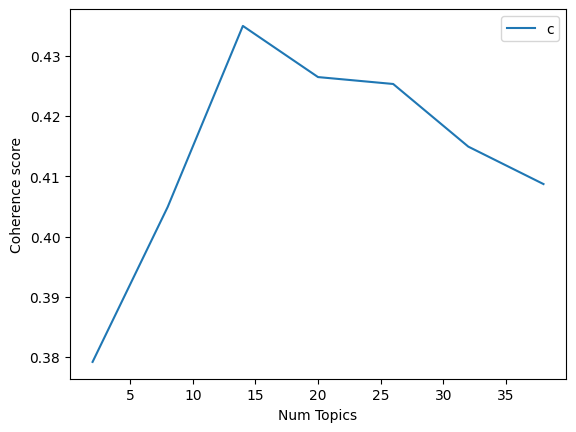

In [65]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
for n_top, coh_val in zip(x, coherence_values):
    print(f"{n_top}: {coh_val}")

2: 0.379198059757037
8: 0.4049219624987458
14: 0.4349494361450067
20: 0.4264617668158645
26: 0.42531597875651755
32: 0.41491911887207344
38: 0.408709741849509


In [67]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"economico" + 0.019*"planeta" + 0.018*"dejar" + 0.017*"bolivia" + '
  '0.017*"evitar" + 0.017*"riesgo" + 0.016*"temperatura" + 0.016*"enfrentar" + '
  '0.016*"tierra" + 0.015*"batalla"'),
 (1,
  '0.029*"foro" + 0.028*"unico" + 0.026*"agenda" + 0.018*"amenazar" + '
  '0.016*"alianza" + 0.015*"exterior" + 0.012*"madrid" + 0.010*"costero" + '
  '0.009*"gasto" + 0.006*"valorar"'),
 (2,
  '0.051*"politico" + 0.022*"europa" + 0.019*"derechos_humanos" + '
  '0.017*"reconocimiento" + 0.016*"reduccion" + 0.015*"defensa" + '
  '0.010*"migrant" + 0.010*"valer" + 0.010*"cdmx" + 0.010*"creciente"'),
 (3,
  '0.072*"carbono" + 0.038*"  " + 0.034*"establecer" + 0.018*"representar" + '
  '0.016*"adoptar" + 0.015*"sufrir" + 0.015*"rio" + 0.015*"estar" + '
  '0.015*"región" + 0.014*"aire"'),
 (4,
  '0.063*"cambioclimatico" + 0.050*"tener" + 0.039*"mexicano" + 0.038*"pedir" '
  '+ 0.021*"numero" + 0.015*"donald_trump" + 0.013*"disponer" + '
  '0.013*"desastre" + 0.011*"presidencia" + 0.011*"